In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Домашнее задание к лекции «Логистическая регрессия и дискриминантный анализ»

## 1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)

## 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [5]:
iris_data = data[['sepal length (cm)', 'sepal width (cm)']].copy()
iris_data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [6]:
iris_data_class = iris.target

## 3. Разделите данные на выборку для обучения и тестирования

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_data_class, test_size=0.25)

## 4. Постройте модель LDA

In [8]:
# Импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
lda = LinearDiscriminantAnalysis()

In [10]:
# Обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
# Делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1])

In [12]:
# Смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,2
1,1,1
2,0,0
3,0,0
4,1,1
5,1,1
6,0,0
7,2,1
8,1,1
9,0,0


In [13]:
# Произведем расчет точности 
# Используем метрику для сбалансированных классов

from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7368421052631579

## 5. Визуализируйте предсказания для тестовой выборки и центры классов

In [14]:
# Построим для тестовой выборки
# Посмотрим на наши центроиды
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(X_test, y_test)
lda_small.means_

array([[5.09090909, 3.49090909],
       [6.02142857, 2.76428571],
       [6.4       , 2.89230769]])

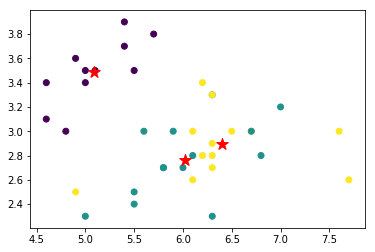

In [15]:
# Визуализируем тестовые данные
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
# Визиализируем центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

In [16]:
# Аналогично сделаем для предсказанных значений
# Посмотрим на наши центроиды
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(X_test, lda.predict(X_test))
lda_small.means_

array([[5.09090909, 3.49090909],
       [5.83125   , 2.8125    ],
       [6.74545455, 2.84545455]])

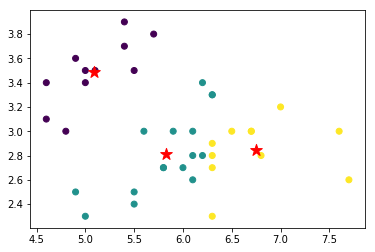

In [17]:
# Визуализируем тестовые данные
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))
# Визиализируем центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

## 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [18]:
iris_data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


## 7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [19]:
# Приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
# Обучим и преобразуем данные
X_scaled = scaler.fit_transform(iris_data[['sepal length (cm)', 'sepal width (cm)']])

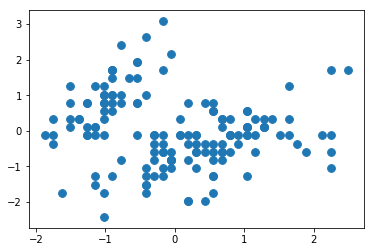

In [22]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [23]:
from sklearn.cluster import KMeans

In [24]:
# Строим график локтя

# Создаем список для инерции
k_inertia = []
# Задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # Добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

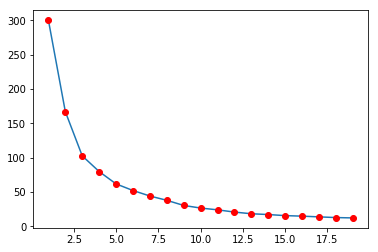

In [25]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [26]:
# Из графика видно, что оптимальное количество кластеров 3

In [27]:
# Явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# Обучаем данные и каждому объекту присваиваем кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

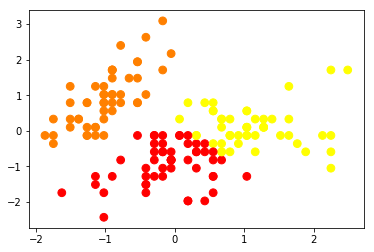

In [28]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

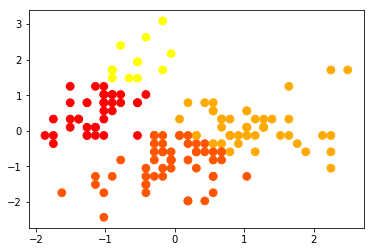

In [29]:
# Сделаем кластеризацию для 4 кластеров
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [30]:
# Из полученных результатов видно, что 3 кластера лучше характеризуют наши данные.